In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
column_names = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
                'CHMAX', 'PRP']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=',', skipinitialspace=True)


In [ ]:
dataset = raw_dataset.copy()

In [ ]:
dataset = dataset.dropna()
dataset.tail()

MYCT  MMIN  MMAX  CACH  CHMIN  CHMAX  PRP
sperry 80/8          124  1000  8000     0     1      8     42   37
       90/80-model-3 98   1000  8000    32     2      8     46   50
sratus 32            125  2000  8000     0     2     14     52   41
wang   vs-100        480   512  8000    32     0      0     67   47
       vs-90         480  1000  4000     0     0      0     45   25

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


In [ ]:
X_train = train_dataset.copy()
X_test = test_dataset.copy()

y_train = X_train.pop('PRP')
y_test = X_test.pop('PRP')


In [ ]:
from sklearn.linear_model import LinearRegression as sk_LinearRegression

regr = sk_LinearRegression()

regr.fit(X_train, y_train)

baseline = regr.score(X_test, y_test)
print("Non-private baseline R2 score: %.2f" % baseline)

Non-private baseline R2 score: 0.93


In [ ]:
from diffprivlib.models import LinearRegression

dp_regr = LinearRegression()
dp_regr.fit(X_train, y_train)

print("R2 score for epsilon=%.2f: %.2f" % (dp_regr.epsilon, dp_regr.score(X_test, y_test)))

R2 score for epsilon=1.00: -58827198.82
/home/tarik/.local/lib/python3.8/site-packages/diffprivlib/models/linear_regression.py:253: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.
  warnings.warn(


In [ ]:
epsilons = np.logspace(-3, 2, 500)
accuracy = []

for epsilon in epsilons: 
    dp_regr = LinearRegression(epsilon=epsilon)
    dp_regr.fit(X_train, y_train)
    accuracy.append(dp_regr.score(X_test, y_test))

ite-packages/diffprivlib/models/linear_regression.py:253: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.
  warnings.warn(
/home/tarik/.local/lib/python3.8/site-packages/diffprivlib/models/linear_regression.py:253: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.
  warnings.warn(
/home/tarik/.local/lib/python3.8/site-packages/diffprivlib/models/linear_regression.py:253: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with n

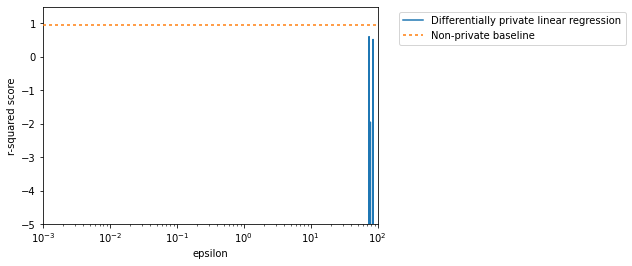

In [ ]:
plt.semilogx(epsilons, accuracy, label="Differentially private linear regression", zorder=10)
plt.semilogx(epsilons, baseline * np.ones_like(epsilons), dashes=[2,2], label="Non-private baseline", zorder=5)
plt.xlabel("epsilon")
plt.ylabel("r-squared score")
plt.ylim(-5, 1.5)
plt.xlim(epsilons[0], epsilons[-1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')